In [ ]:
!pwd

/content


In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json


In [ ]:
! kaggle datasets download -d donjon00/covid19-detection

100% 3.07G/3.08G [00:34<00:00, 47.0MB/s]
100% 3.08G/3.08G [00:34<00:00, 96.5MB/s]


In [ ]:
cp "/content/covid19-detection.zip" "/content/drive/MyDrive/Colab Notebooks/Major/covid19-detection.zip"

In [ ]:
zf = "/content/covid19-detection.zip"
target_dir = "/content/drive/MyDrive/Colab Notebooks/Major/Data"

!unzip -qq "/content/drive/MyDrive/Colab Notebooks/Major/covid19-detection.zip" -d "/content/drive/MyDrive/Colab Notebooks/Major"

In [ ]:
IMG_HEIGHT = 299
IMG_WIDTH = 299

!rm -r "/content/drive/MyDrive/Colab Notebooks/Major/Data1/"
!mkdir "/content/drive/MyDrive/Colab Notebooks/Major/Data1/"
!cd "/content/drive/MyDrive/Colab Notebooks/Major/Data1/" && mkdir train test val
!cd "/content/drive/MyDrive/Colab Notebooks/Major/Data1/train" && mkdir Normal PNEUMONIA COVID Fibrosis Tuberculosis
!cd "/content/drive/MyDrive/Colab Notebooks/Major/Data1/test" && mkdir Normal PNEUMONIA COVID Fibrosis Tuberculosis
!cd "/content/drive/MyDrive/Colab Notebooks/Major/Data1/val" && mkdir Normal PNEUMONIA COVID Fibrosis Tuberculosis

In [ ]:
def create_dataset(img_folder):
    #img_data_array=[]
    #class_name=[]
    i = 1
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            # print(image, image_path)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
#             image = image.astype('float32')
#             image /= 255 
            #img_data_array.append(image)
            #class_name.append(dir1)
#             print(file, dir1)
#             break
            if i < 71:
                cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/Major/Data1/train/" +dir1+"/"+file, image)
            elif i < 86:
                cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/Major/Data1/test/" +dir1+"/"+file, image)
            else:
                pat = "/content/drive/MyDrive/Colab Notebooks/Major/Data1/val/" +dir1+"/"+file
                cv2.imwrite(pat, image)
                # if i ==86:
                    # print(pat)
            i += 1
            if i == 101:
                i = 1
        
# extract the image array and class name
# img_data, class_name = create_dataset(r'../input/covid19-detection/Data')
create_dataset(r"/content/drive/MyDrive/Colab Notebooks/Major/Data/")

In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/Major/Data/Normal" | wc -l

11767


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/Major/Data1/test/Normal" | wc -l

1755


In [2]:
batch_size = 32
img_height = 299
img_width = 299
data_dir = "/content/drive/MyDrive/Colab Notebooks/Major/Data"
image_size = (img_height, img_width)

In [ ]:
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir,
#     validation_split=0.2,
#     subset="training",
#     seed=1337,
#     image_size=image_size,
#     batch_size=batch_size,
#     label_mode='categorical'
# )
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir,
#     validation_split=0.2,
#     subset="validation",
#     seed=1337,
#     image_size=image_size,
#     batch_size=batch_size,
#     label_mode='categorical'
# )
# print(train_ds)

Found 24834 files belonging to 3 classes.
Using 19868 files for training.
Found 24834 files belonging to 3 classes.
Using 4966 files for validation.
<BatchDataset shapes: ((None, 299, 299, 3), (None, 3)), types: (tf.float32, tf.float32)>


In [3]:
data_dir1 = "/content/drive/MyDrive/Colab Notebooks/Major/Data1/train"
data_dir2 = "/content/drive/MyDrive/Colab Notebooks/Major/Data1/val"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir1,
  validation_split=None,
  shuffle=True,
  image_size=(img_height, img_width),
  subset=None,
  seed=123,
  batch_size=batch_size,
  label_mode='categorical'
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir2,
  validation_split=None,
  shuffle=True,
  image_size=(img_height, img_width),
  subset=None,
  seed=123,
  batch_size=batch_size,
  label_mode='categorical'
)

Found 17394 files belonging to 5 classes.
Found 3720 files belonging to 5 classes.


In [4]:
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [13]:
from keras.layers import Conv2D, MaxPooling2D
cnn = Sequential()

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Flatten())

# cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(5, activation = 'softmax'))


cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
cnn.build(input_shape=(1, img_width, img_height, 3))
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_20 (ModuleWra multiple                  896       
_________________________________________________________________
module_wrapper_21 (ModuleWra multiple                  0         
_________________________________________________________________
module_wrapper_22 (ModuleWra multiple                  9248      
_________________________________________________________________
module_wrapper_23 (ModuleWra multiple                  0         
_________________________________________________________________
module_wrapper_24 (ModuleWra multiple                  9248      
_________________________________________________________________
module_wrapper_25 (ModuleWra multiple                  0         
_________________________________________________________________
module_wrapper_26 (ModuleWra multiple                 

In [ ]:
# from tensorflow.keras.utils import plot_model
# plot_model(cnn,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)
# not working, only works in kaggle i think

In [6]:
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=3)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

callbacks_list = [ early, learning_rate_reduction]

In [17]:
cnn.fit(
    train_ds ,
    epochs=25, 
    validation_data=val_ds, 
)


Epoch 1/25
544/544 [==============================] - 1736s 3s/step - loss: 1.0301 - accuracy: 0.6914 - val_loss: 0.5892 - val_accuracy: 0.7860
Epoch 2/25
544/544 [==============================] - 85s 155ms/step - loss: 0.5726 - accuracy: 0.7975 - val_loss: 0.5592 - val_accuracy: 0.7898
Epoch 3/25
544/544 [==============================] - 84s 154ms/step - loss: 0.5051 - accuracy: 0.8184 - val_loss: 0.5354 - val_accuracy: 0.8102
Epoch 4/25
544/544 [==============================] - 84s 153ms/step - loss: 0.4611 - accuracy: 0.8343 - val_loss: 0.4523 - val_accuracy: 0.8358
Epoch 5/25
544/544 [==============================] - 84s 153ms/step - loss: 0.4114 - accuracy: 0.8538 - val_loss: 0.4391 - val_accuracy: 0.8422
Epoch 6/25
544/544 [==============================] - 84s 153ms/step - loss: 0.3765 - accuracy: 0.8650 - val_loss: 0.4240 - val_accuracy: 0.8511
Epoch 7/25
544/544 [==============================] - 83s 152ms/step - loss: 0.3600 - accuracy: 0.8697 - val_loss: 0.3897 - val_acc

In [18]:
data_dir2 = "/content/drive/MyDrive/Colab Notebooks/Major/Data1/test"
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir2,
  validation_split=None,
  shuffle=True,
  image_size=(img_height, img_width),
  subset=None,
  seed=123,
  batch_size=batch_size,
  label_mode='categorical'
)

Found 3720 files belonging to 5 classes.


In [19]:
test_accu = cnn.evaluate(test_ds)
print('The testing accuracy is :',test_accu[1]*100, '%')

117/117 [==============================] - 379s 3s/step - loss: 0.5005 - accuracy: 0.8761
The testing accuracy is : 87.6075267791748 %


In [21]:
preds = cnn.predict(test_ds,verbose=1)

117/117 [==============================] - 10s 77ms/step


In [22]:
true_categories = tf.concat([y for x, y in test_ds], axis=0)

pd = preds.copy()
preds = []
for v in pd:
    x = []
    i = max(v)
    for val in v:
        if val == i:
            x.append(1)
        else:
            x.append(0)
    preds.append(x)

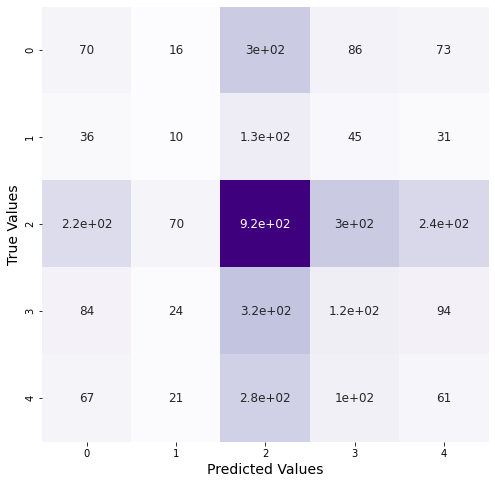

In [23]:
import pandas as pds
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_categories.numpy().argmax(axis=1), np.array(preds).argmax(axis=1))
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.4) #for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 12},
     cbar = False, cmap='Purples');
ax1.set_ylabel('True Values',fontsize=14)
ax1.set_xlabel('Predicted Values',fontsize=14)
plt.show()


# normal is increasing accuracy too much, we need to decrease number of images in normal 